# Imported pack 

In [159]:
import pandas as pd
import numpy as np
from numpy import random
import os
from collections import Counter
os.chdir(r'D:\PG-DBDA\R-Studio')
import matplotlib
from matplotlib import pyplot as plt
import scipy
from scipy import stats
from scipy.stats import binom,poisson,norm ,t
import seaborn as sns
import pylab
from pylab import legend,plot, show,title,xlabel,ylabel
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels
from statsmodels import stats
from statsmodels.stats import proportion
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# Imported the both Data set

In [160]:
df=pd.read_csv('previous_application.csv')

In [193]:
df.shape

(1670214, 37)

In [200]:
df1=pd.read_csv('application_data.csv')

In [125]:
df1.shape

(307511, 122)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [127]:
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#  Data Cleaning application data

In [298]:
df1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

In [296]:
# you will get all the statistical information for the numeric columns and know their distribution inspection outliers.
df1.describe()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,...,0.142944,1.400626,0.099717,962.855657,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,...,0.446033,2.377224,0.361735,826.808966,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,...,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,...,0.000000,0.000000,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,...,0.000000,2.000000,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,...,34.000000,344.000000,24.000000,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [202]:
# check the null value percentage column wise.Handling Null Values
(df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Text(0, 0.5, 'Count of Null values')

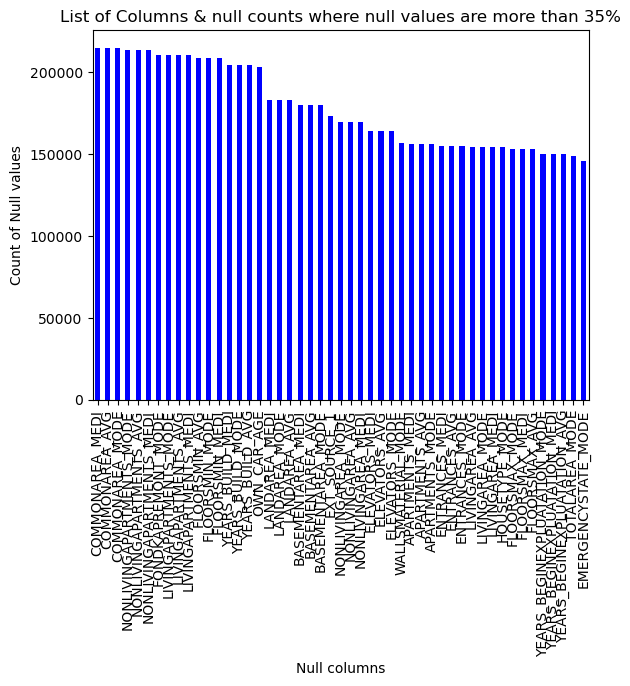

In [204]:
null_col=df1.isnull().sum().sort_values(ascending=False)
null_col=null_col[null_col.values > (0.35*len(df1))]
# #Plotting Bar Graph for null values greater than 35%
null_col.plot(kind='bar',color='Blue')
plt.title("List of Columns & null counts where null values are more than 35%")
plt.xlabel("Null columns")
plt.ylabel("Count of Null values")

<!-- Theoretically, 25 to 30% of the variable’s missing values are allowed, beyond which we might want to drop it from analysis. Practically, we get variables with ~50% missing values, but still, the customer insists on having it for analysis. In those cases, we have to treat them accordingly. Here, we will remove columns with null values of more than 35% after observing those columns. -->

In [206]:
# check the count of null_col
len(null_col)

49

In [208]:
# create the list and save the null_col. 
labels=list(null_col.index.values)
labels

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [210]:
# Drop the column from  application data
df1.drop(labels=labels,axis=1,inplace=True)
df1.shape

(307511, 73)

In [212]:
null = (df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
null.head(30)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [214]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

df1.AMT_REQ_CREDIT_BUREAU_MON.fillna(df1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  

df1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

df1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

df1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

df1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

df1.NAME_TYPE_SUITE.fillna(df1.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

df1.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

df1.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

df1.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

df1.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

df1.CNT_FAM_MEMBERS.fillna(df1.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

df1.DAYS_LAST_PHONE_CHANGE.fillna(df1.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

df1.EXT_SOURCE_2.fillna(df1.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

df1.EXT_SOURCE_3.fillna(df1.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

C:\Users\hp\AppData\Local\Temp\ipykernel_64640\4203994792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR
C:\Users\hp\AppData\Local\Temp\ipykernel_64640\4203994792.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obje

In [138]:
# We didn’t impute OCCUPATION_TYPE because it may contain some hul information, so impOCCUATION_TYPEean or median doesn’t make any sense.

In [216]:
# Rechecking null values after imputing null values.
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_3                 0.000000
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

In [218]:
# I observe the columns carefully, i find that some columns contain errors. So, I done some changes.
df1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


In [220]:
# collect the columns with starting 'Days' in the list 'day_cols'
day_cols = [i for i in df1 if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [222]:
# applying abs this used for negative value changes into positive value.
df1[day_cols]= abs(df1[day_cols])
print(df1['DAYS_BIRTH'].unique())
print(df1['DAYS_EMPLOYED'].unique()) 
print(df1['DAYS_REGISTRATION'].unique())
print(df1['DAYS_ID_PUBLISH'].unique()) 
print(df1['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [224]:
# some column have 'Y/N' type values . i changed with 1/0 for easy understanding.
df1['FLAG_OWN_CAR'] = np.where(df1['FLAG_OWN_CAR']=='Y', 1 , 0)  
df1['FLAG_OWN_REALTY'] = np.where(df1['FLAG_OWN_REALTY']=='Y', 1 , 0)

In [226]:
df1[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,0,1
1,0,0
2,1,1
3,0,1
4,0,1


# Let’s check the distribution for columns having categorical values. After checking all the columns, I found that some contain ‘XNA’ values, meaning null. I impute it accordingly.

In [228]:
df1.CODE_GENDER.value_counts()
df1.loc[df1.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
df1.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [230]:
df1.ORGANIZATION_TYPE.value_counts().head()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64

In [232]:
df1.NAME_INCOME_TYPE.value_counts()    #Check the counts for each in NAME_INCOME_TYPE

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [234]:
df1['AMT_INCOME_TYPE'] = pd.qcut(df1.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']) 
df1['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [236]:
df1['DAYS_BIRTH']= (df1['DAYS_BIRTH']/365).astype(int)    # Converting 
df1['DAYS_BIRTH'].unique()
df1['AGE_GROUP']=pd.cut(df1['DAYS_BIRTH'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])   #Binning

df1[['DAYS_BIRTH','AGE_GROUP']].head()

,DAYS_BIRTH,AGE_GROUP
0,25,Very_Young
1,45,Middle_Age
2,52,Middle_Age
3,52,Middle_Age
4,54,Middle_Age


In [238]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int32   
 5   FLAG_OWN_REALTY              307511 non-null  int32   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [240]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [242]:
df1.drop(labels=unwanted,axis=1,inplace=True)

In [244]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int32   
 5   FLAG_OWN_REALTY              307511 non-null  int32   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [248]:
numerical_col = df1.select_dtypes(include='number').columns
len(numerical_col)

35

#  Data cleaning previuous Data

In [294]:
df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [300]:
# check the null value percentage column wise.Handling Null Values
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

Text(0, 0.5, 'Count of Null values')

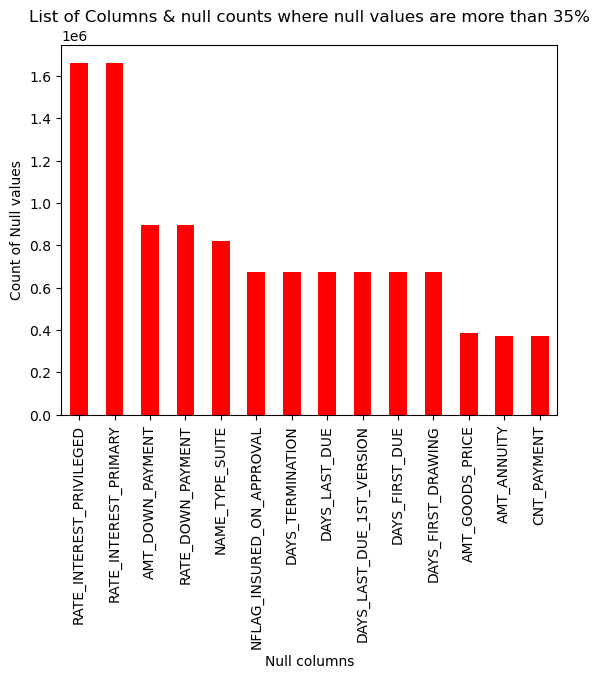

In [304]:
null_col=df.isnull().sum().sort_values(ascending=False)
null_col=null_col[null_col.values > (0.35*len(df1))]
# #Plotting Bar Graph for null values greater than 35%
null_col.plot(kind='bar',color='Red')
plt.title("List of Columns & null counts where null values are more than 35%")
plt.xlabel("Null columns")
plt.ylabel("Count of Null values")

In [306]:
# create the list and save the null_col. 
labels=list(null_col.index.values)
labels

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_PAYMENT']

In [308]:
# Drop the column from previous application data
df.drop(labels=labels,axis=1,inplace=True)
df.shape

(1670214, 23)

In [312]:
null = (df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)
null.head(30)

PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
NAME_PAYMENT_TYPE              0.000000
NAME_YIELD_GROUP               0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_APPLICATION                0.000000
NAME_CONTRACT_TYPE             0.000000
DAYS_DECISION                  0.000000
dtype: float64

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [322]:
# Drop the null values.
df_cleaned = df.dropna(subset=['AMT_CREDIT', 'PRODUCT_COMBINATION'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1669867 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1669867 non-null  int64  
 1   SK_ID_CURR                   1669867 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669867 non-null  object 
 3   AMT_APPLICATION              1669867 non-null  float64
 4   AMT_CREDIT                   1669867 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1669867 non-null  object 
 6   HOUR_APPR_PROCESS_START      1669867 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1669867 non-null  object 
 10  NAME_CONTRACT_STATUS         1669867 non-null  object 
 11  DAYS_DECISION                1669867 non-null  int64  
 12  NAME_PAYMENT_TYPE            1669867 non-null  

# Loan Trends

C:\Users\hp\AppData\Local\Temp\ipykernel_64640\2835751577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='NAME_CONTRACT_TYPE', palette='viridis')


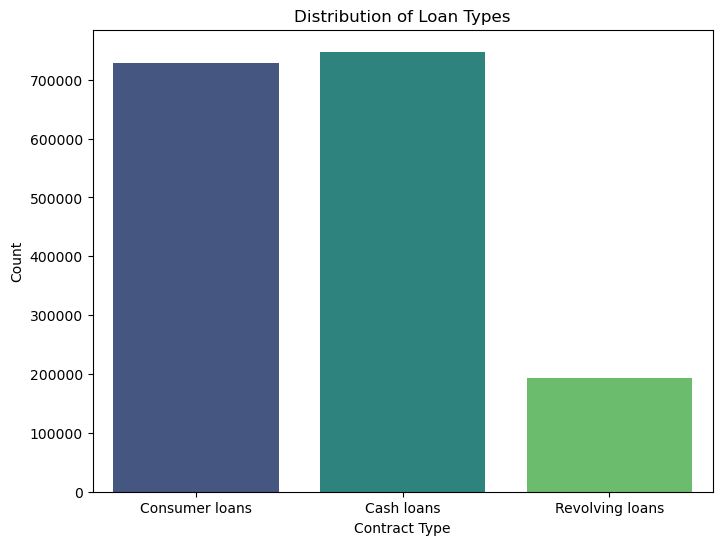

In [328]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='NAME_CONTRACT_TYPE', palette='viridis')
plt.title('Distribution of Loan Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# The Consumer loans and Cash loans categories dominate the dataset, each having a very high count (above 700,000). This indicates that these two loan types are the most common.
# Revolving loans have significantly fewer instances, with a count below 200,000.
# The focus for financial institutions and analysts may be primarily on consumer loans and cash loans, as they represent the majority of loan products.
# Revolving loans may require further investigation to determine why they are less common.
# Targeted Marketing: Focusing more on promoting revolving loans could help increase their adoption.
# Understanding Customer Needs: Analyzing why certain demographics or regions opt less for revolving loans could guide product development.
# Customization: Offering tailored revolving loan options may cater to specific needs, increasing demand.

# check Approval Rates

C:\Users\hp\AppData\Local\Temp\ipykernel_64640\3295566500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=approval_status.index, y=approval_status.values, palette='coolwarm')


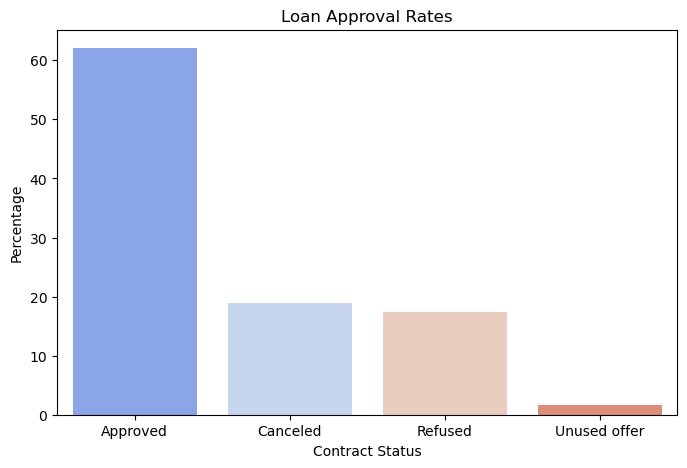

In [333]:
approval_status = df['NAME_CONTRACT_STATUS'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=approval_status.index, y=approval_status.values, palette='coolwarm')
plt.title('Loan Approval Rates')
plt.xlabel('Contract Status')
plt.ylabel('Percentage')
plt.show()

# High Approval Rate: The fact that over 60% of loan applications are approved indicates that the majority of applications meet the necessary criteria set by the financial institution.
# Cancellation Rate: The 20% cancellation rate could be a result of various factors such as incomplete documentation, changed circumstances, or applicants withdrawing the application. It may also indicate inefficiencies in the approval process that need improvement.
# Refusal Rate: While lower than cancellations, the refusal rate (10-15%) could highlight stricter eligibility criteria or specific risk factors considered during the loan approval process.
# Unused Offers: A small percentage of unused offers could suggest that some approved loans are not pursued by borrowers for various reasons such as better financial circumstances, change of plans, or dissatisfaction with loan terms.

# Customer Type Distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_64640\1839022595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=client_type_dist.index, y=client_type_dist.values, palette='magma')


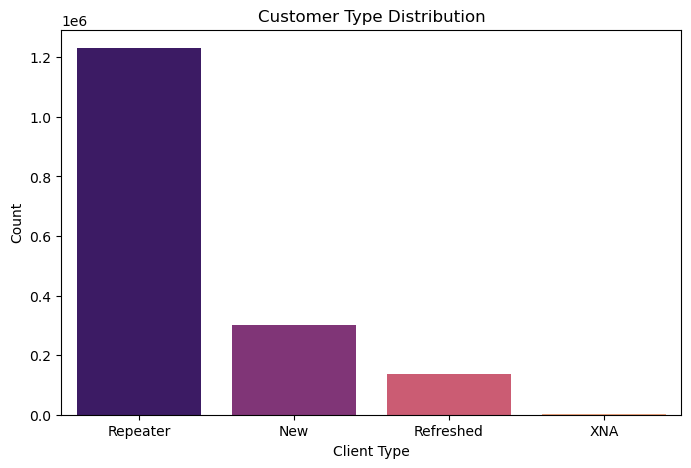

In [337]:
client_type_dist = df['NAME_CLIENT_TYPE'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=client_type_dist.index, y=client_type_dist.values, palette='magma')
plt.title('Customer Type Distribution')
plt.xlabel('Client Type')
plt.ylabel('Count')
plt.show()

# This group represents the majority, with over 80% of the clients being repeat borrowers. This indicates strong customer retention and potentially high satisfaction with past interactions.
# New clients make up around 20% of the total, highlighting a steady stream of new business. However, this percentage is lower compared to repeat clients, indicating that attracting new customers might require more effort in terms of marketing and product offerings.
# The "Refreshed" category, which likely indicates clients revisiting past loans or renewing them, comprises a smaller segment.
# The minimal number of XNA clients (1,941) suggests very low involvement or issues in data classification/collection for this category. This could be an area for further investigation and data cleanup.

In [352]:
client_type_dist = df['NAME_CLIENT_TYPE'].value_counts()
client_type_dist

NAME_CLIENT_TYPE
Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: count, dtype: int64

# checking for Comparison of AMT_APPLICATION and AMT_CREDIT

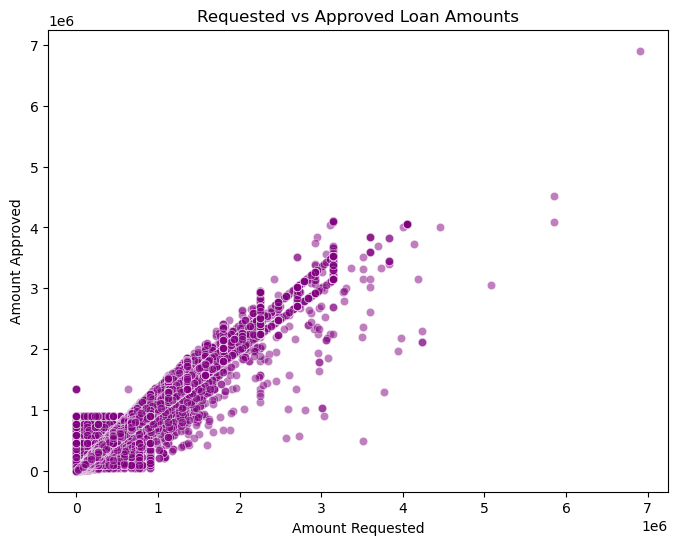

In [347]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AMT_APPLICATION', y='AMT_CREDIT', alpha=0.5, color='purple')
plt.title('Requested vs Approved Loan Amounts')
plt.xlabel('Amount Requested')
plt.ylabel('Amount Approved')
plt.show()

# Anlaysis for application Data 

# Data Imbalance

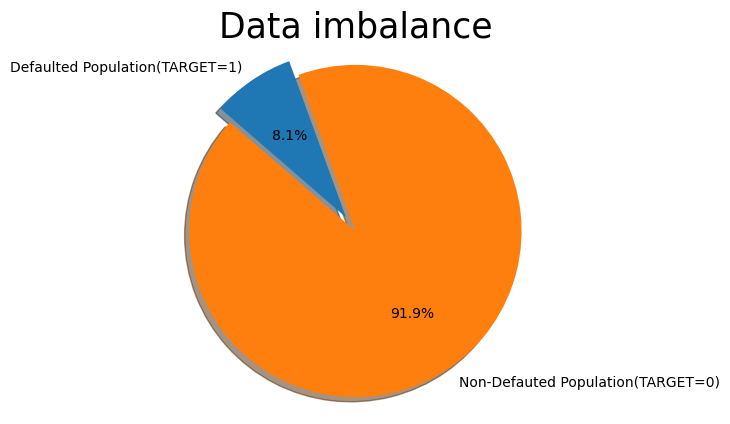

In [266]:
count1 = 0 
count0 = 0
for i in df1['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df1['TARGET']))*100
count0 = (count0/len(df1['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)


fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show() 

# df1 dataframe that is application data is highly imbalanced. Defaulted population is 8.1 % and non- defaulted population is 91.9% .Ratio is 11.3

# Gender Wise Distribution 

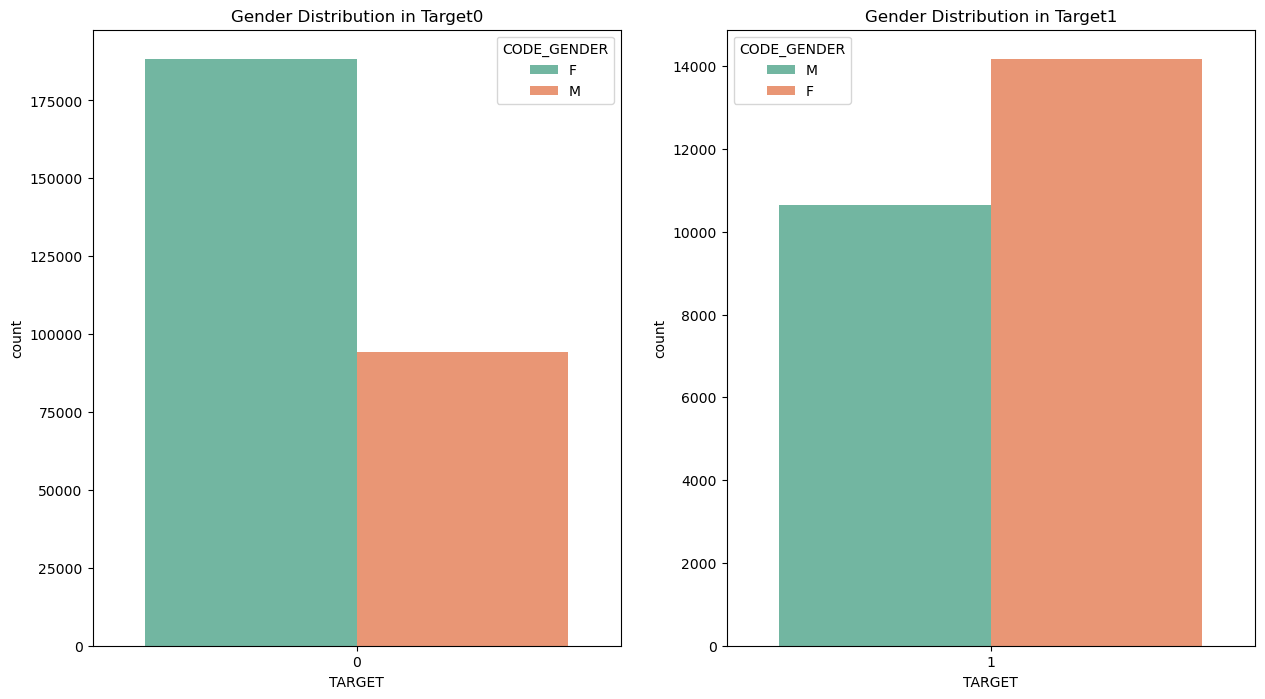

In [281]:
Target0 = df1[df1['TARGET'] == 0]
Target1 = df1[df1['TARGET'] == 1]

plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

# It seems like Female clients applied more than male clients for loan
# 66.6% Female clients are non-defaulters while 33.4% male clients are non-defaulters.
# 57% Female clients are defaulters, while 42% male can apply are defaulters.

# Age wise Distribuction on Target0 and Target1

Text(0.5, 1.0, 'Age Distribution in Target1')

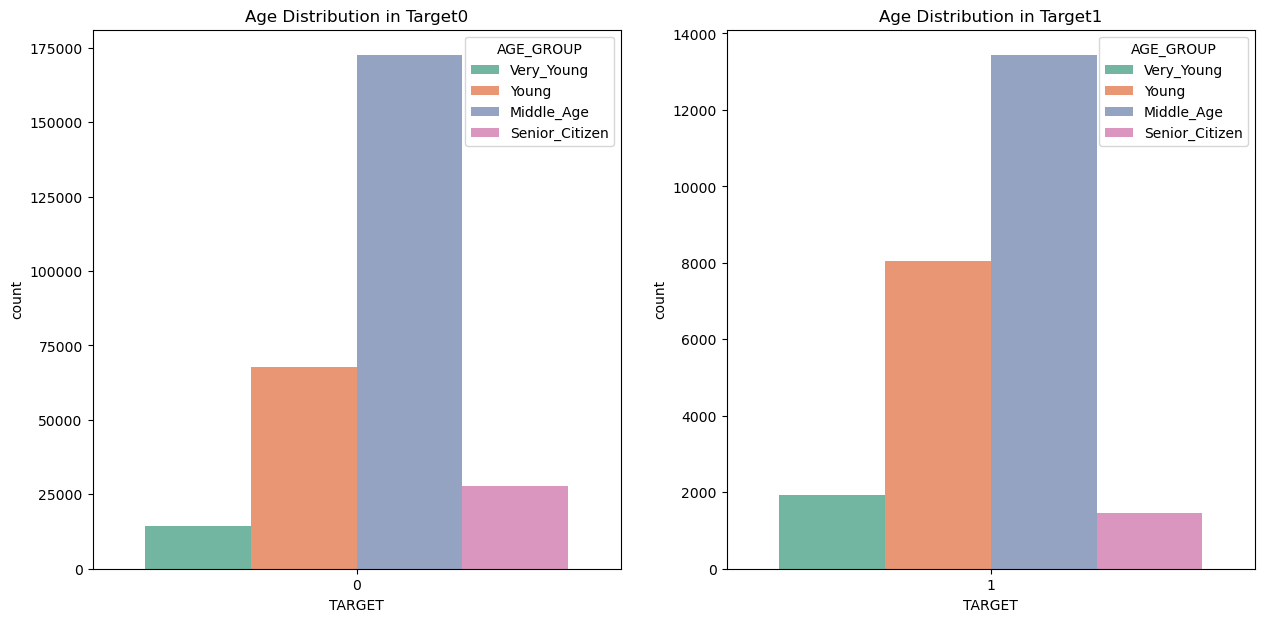

In [288]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0, palette = 'Set2')
plt.title("Age Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1, palette = 'Set2')
plt.title("Age Distribution in Target1")

# Middle Age(35-60) The group seems to apply to any other age groups for loans in the case of defaulters and non-defaulters.
# Also, Middle Age group facing paying difficulties the most.
# While Senior Citizens(60-100) and Very young(19-25) age group faces paying difficulties less than other age groups.

#  use pairplot to get the required charts

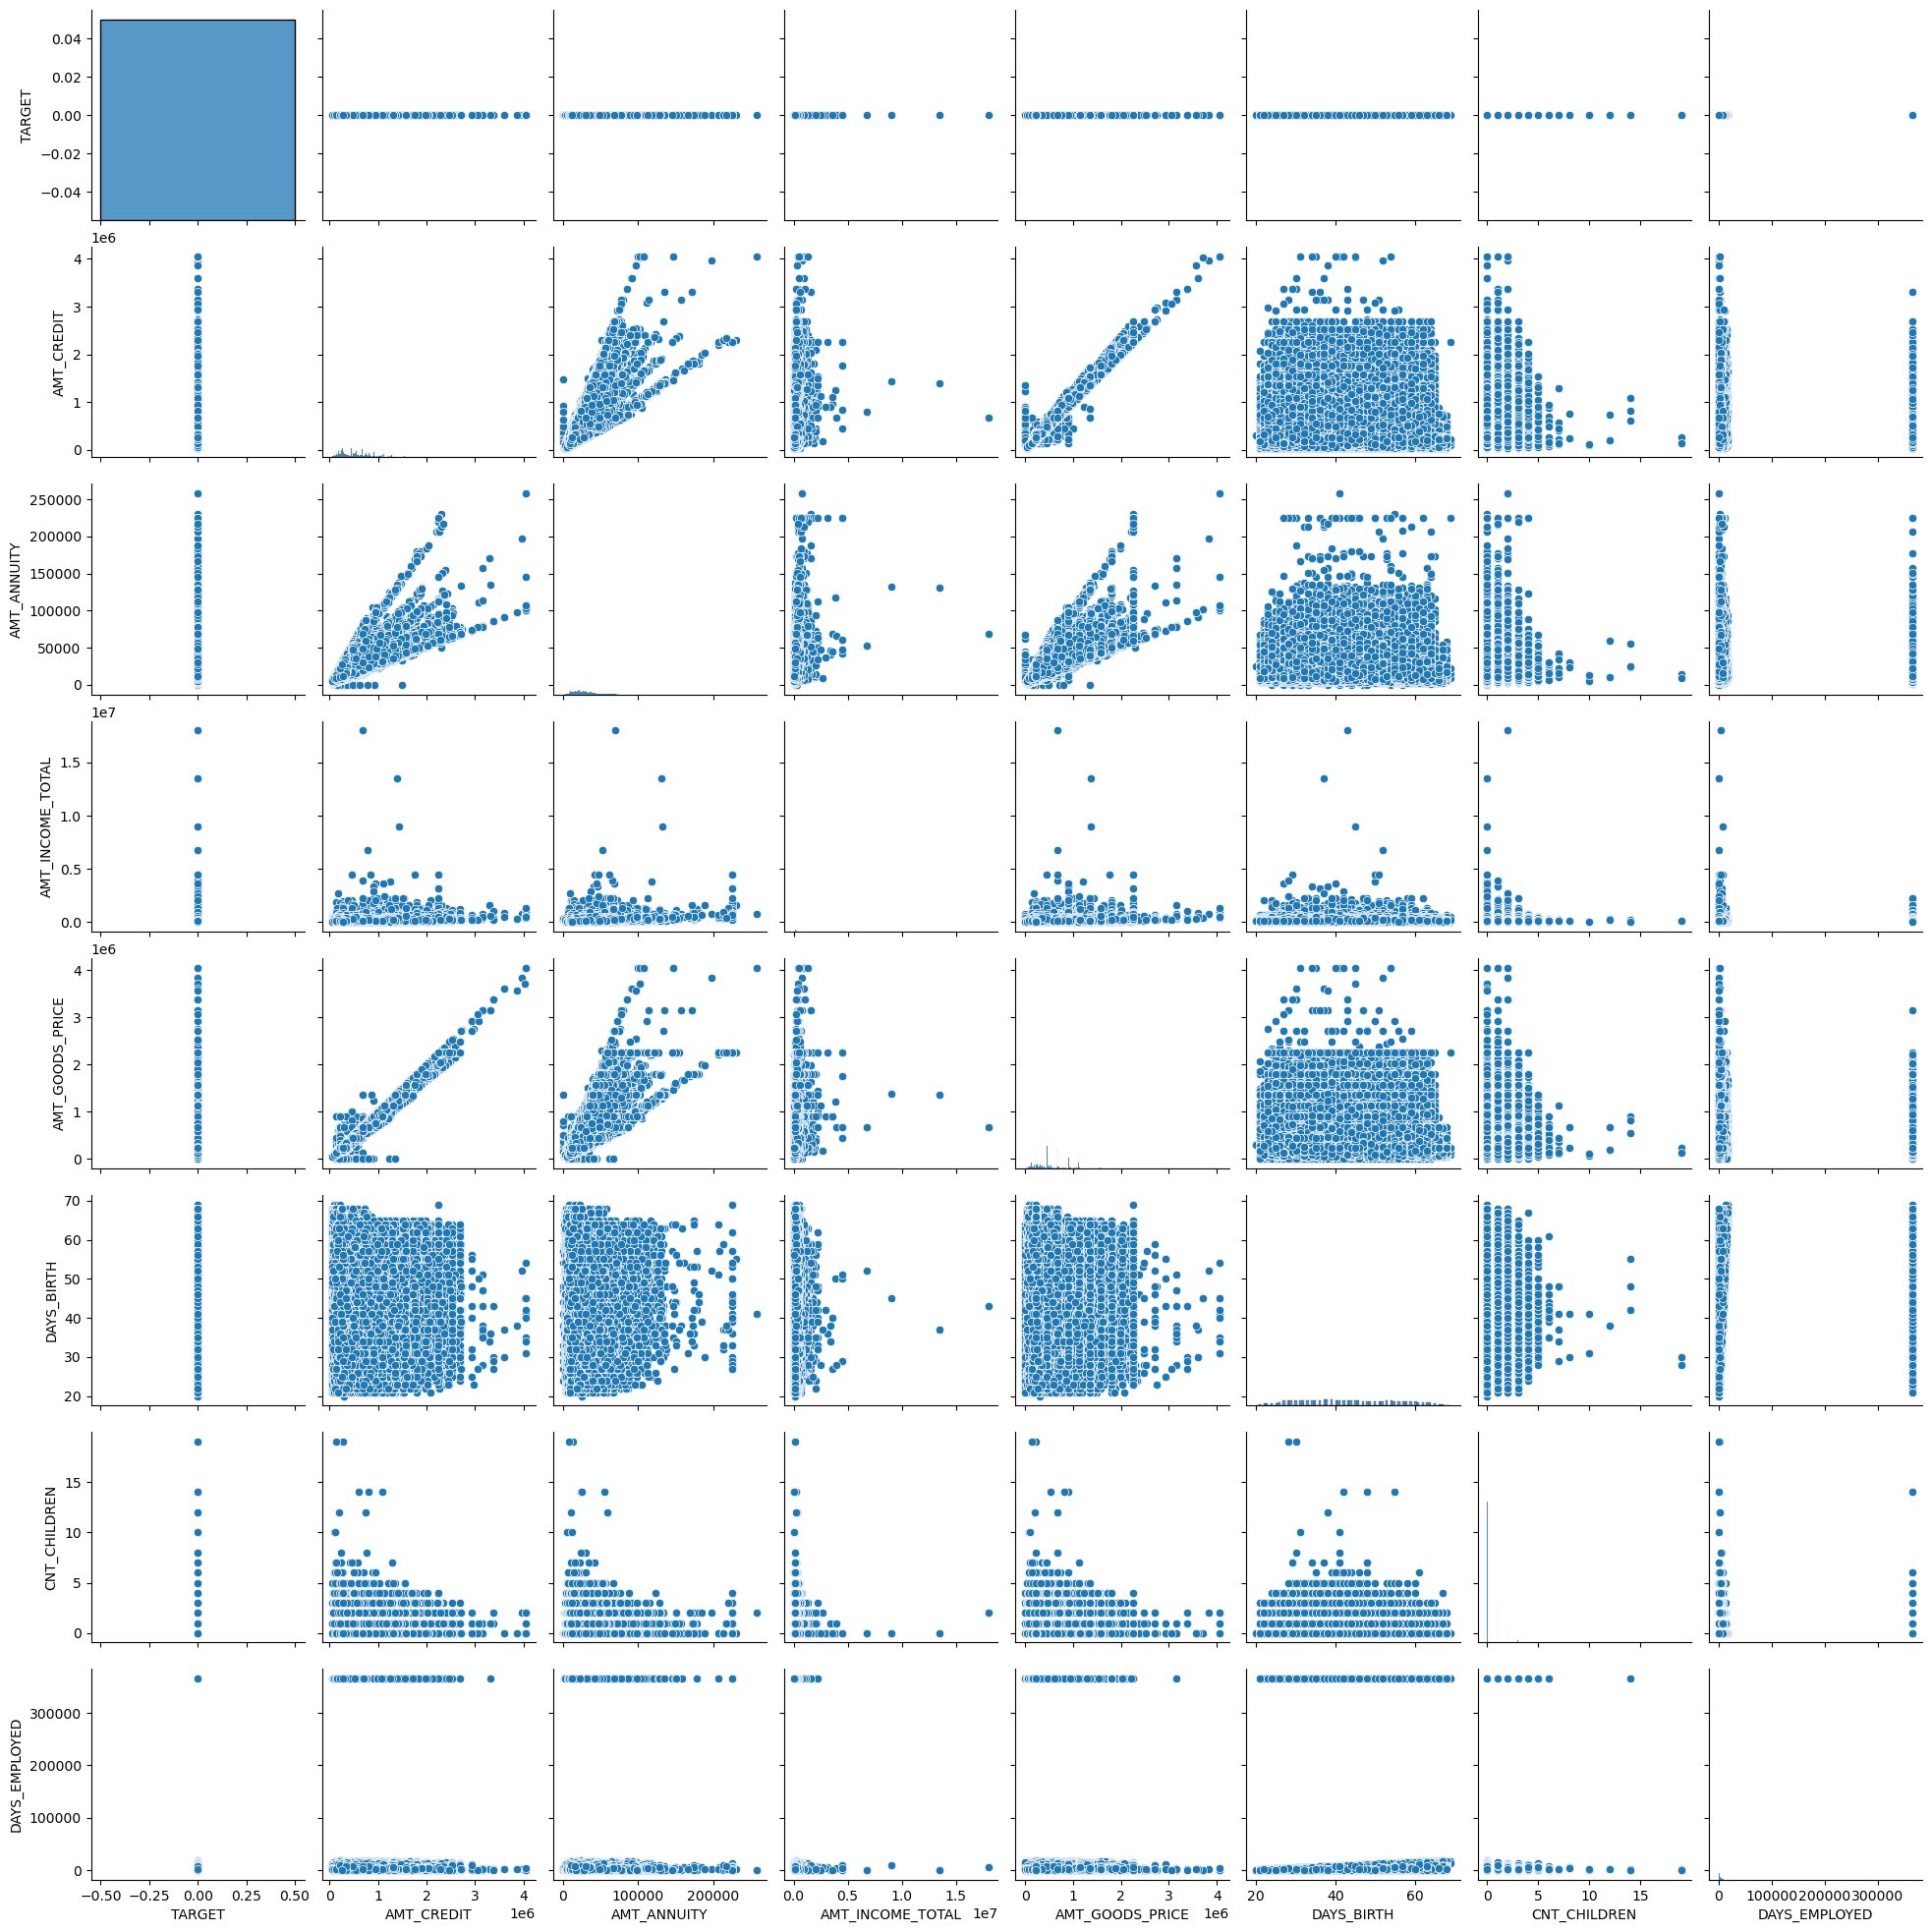

In [358]:
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

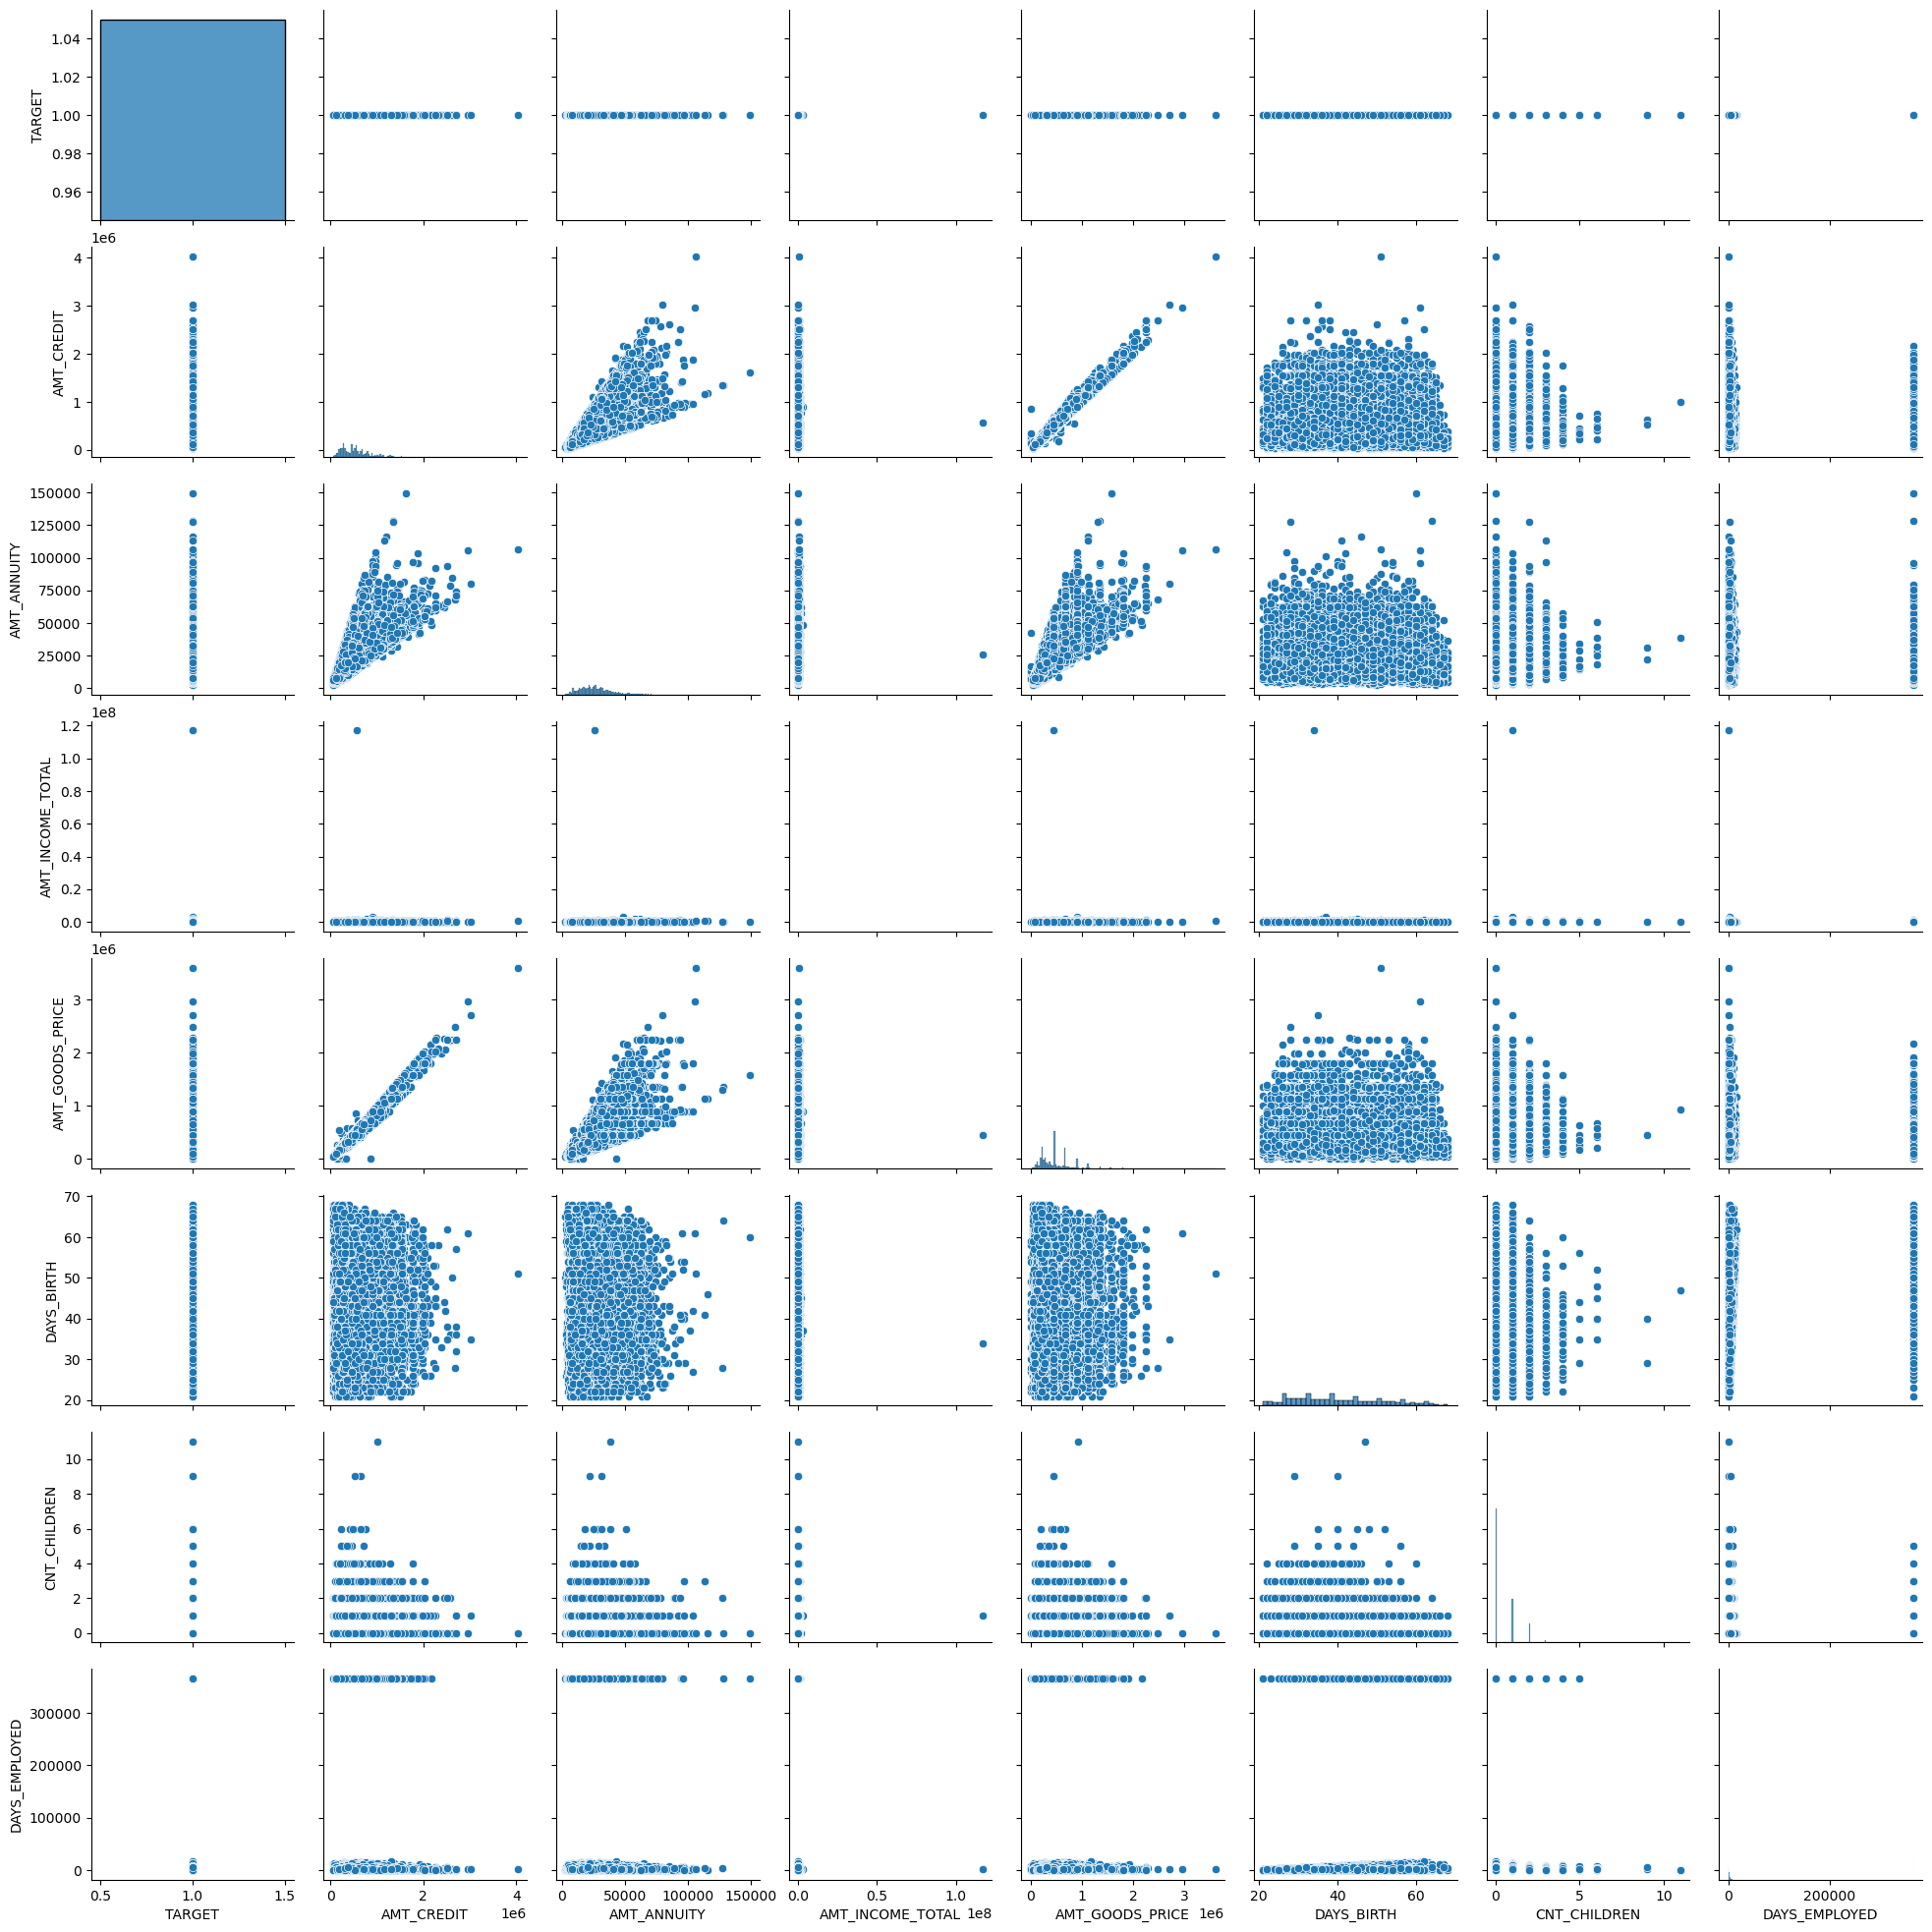

In [356]:
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

# AMT_CREDIT and AMT_GOODS_PRICE are highly correlated variables for both defaulters and non-defaulters. So, as the home price increases, the loan amount also increases
# AMT_CREDIT and AMT_ANNUITY (EMI) are highly correlated variables for both defaulters and non-defaulters. So, as the home price increases, the EMI amount also increases, which is logical.
# All three variables AMT_CREDIT, AMT_GOODS_PRICE and AMT_ANNUITY are highly correlated for both defaulters and non-defaulters, which might not give a good indicator for heat maps detection.

# ORGANIZATION TYPE

C:\Users\hp\AppData\Local\Temp\ipykernel_64640\43430517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =Target0, y = 'ORGANIZATION_TYPE', order = Target0['ORGANIZATION_TYPE'].value_counts().index, palette = 'viridis' )


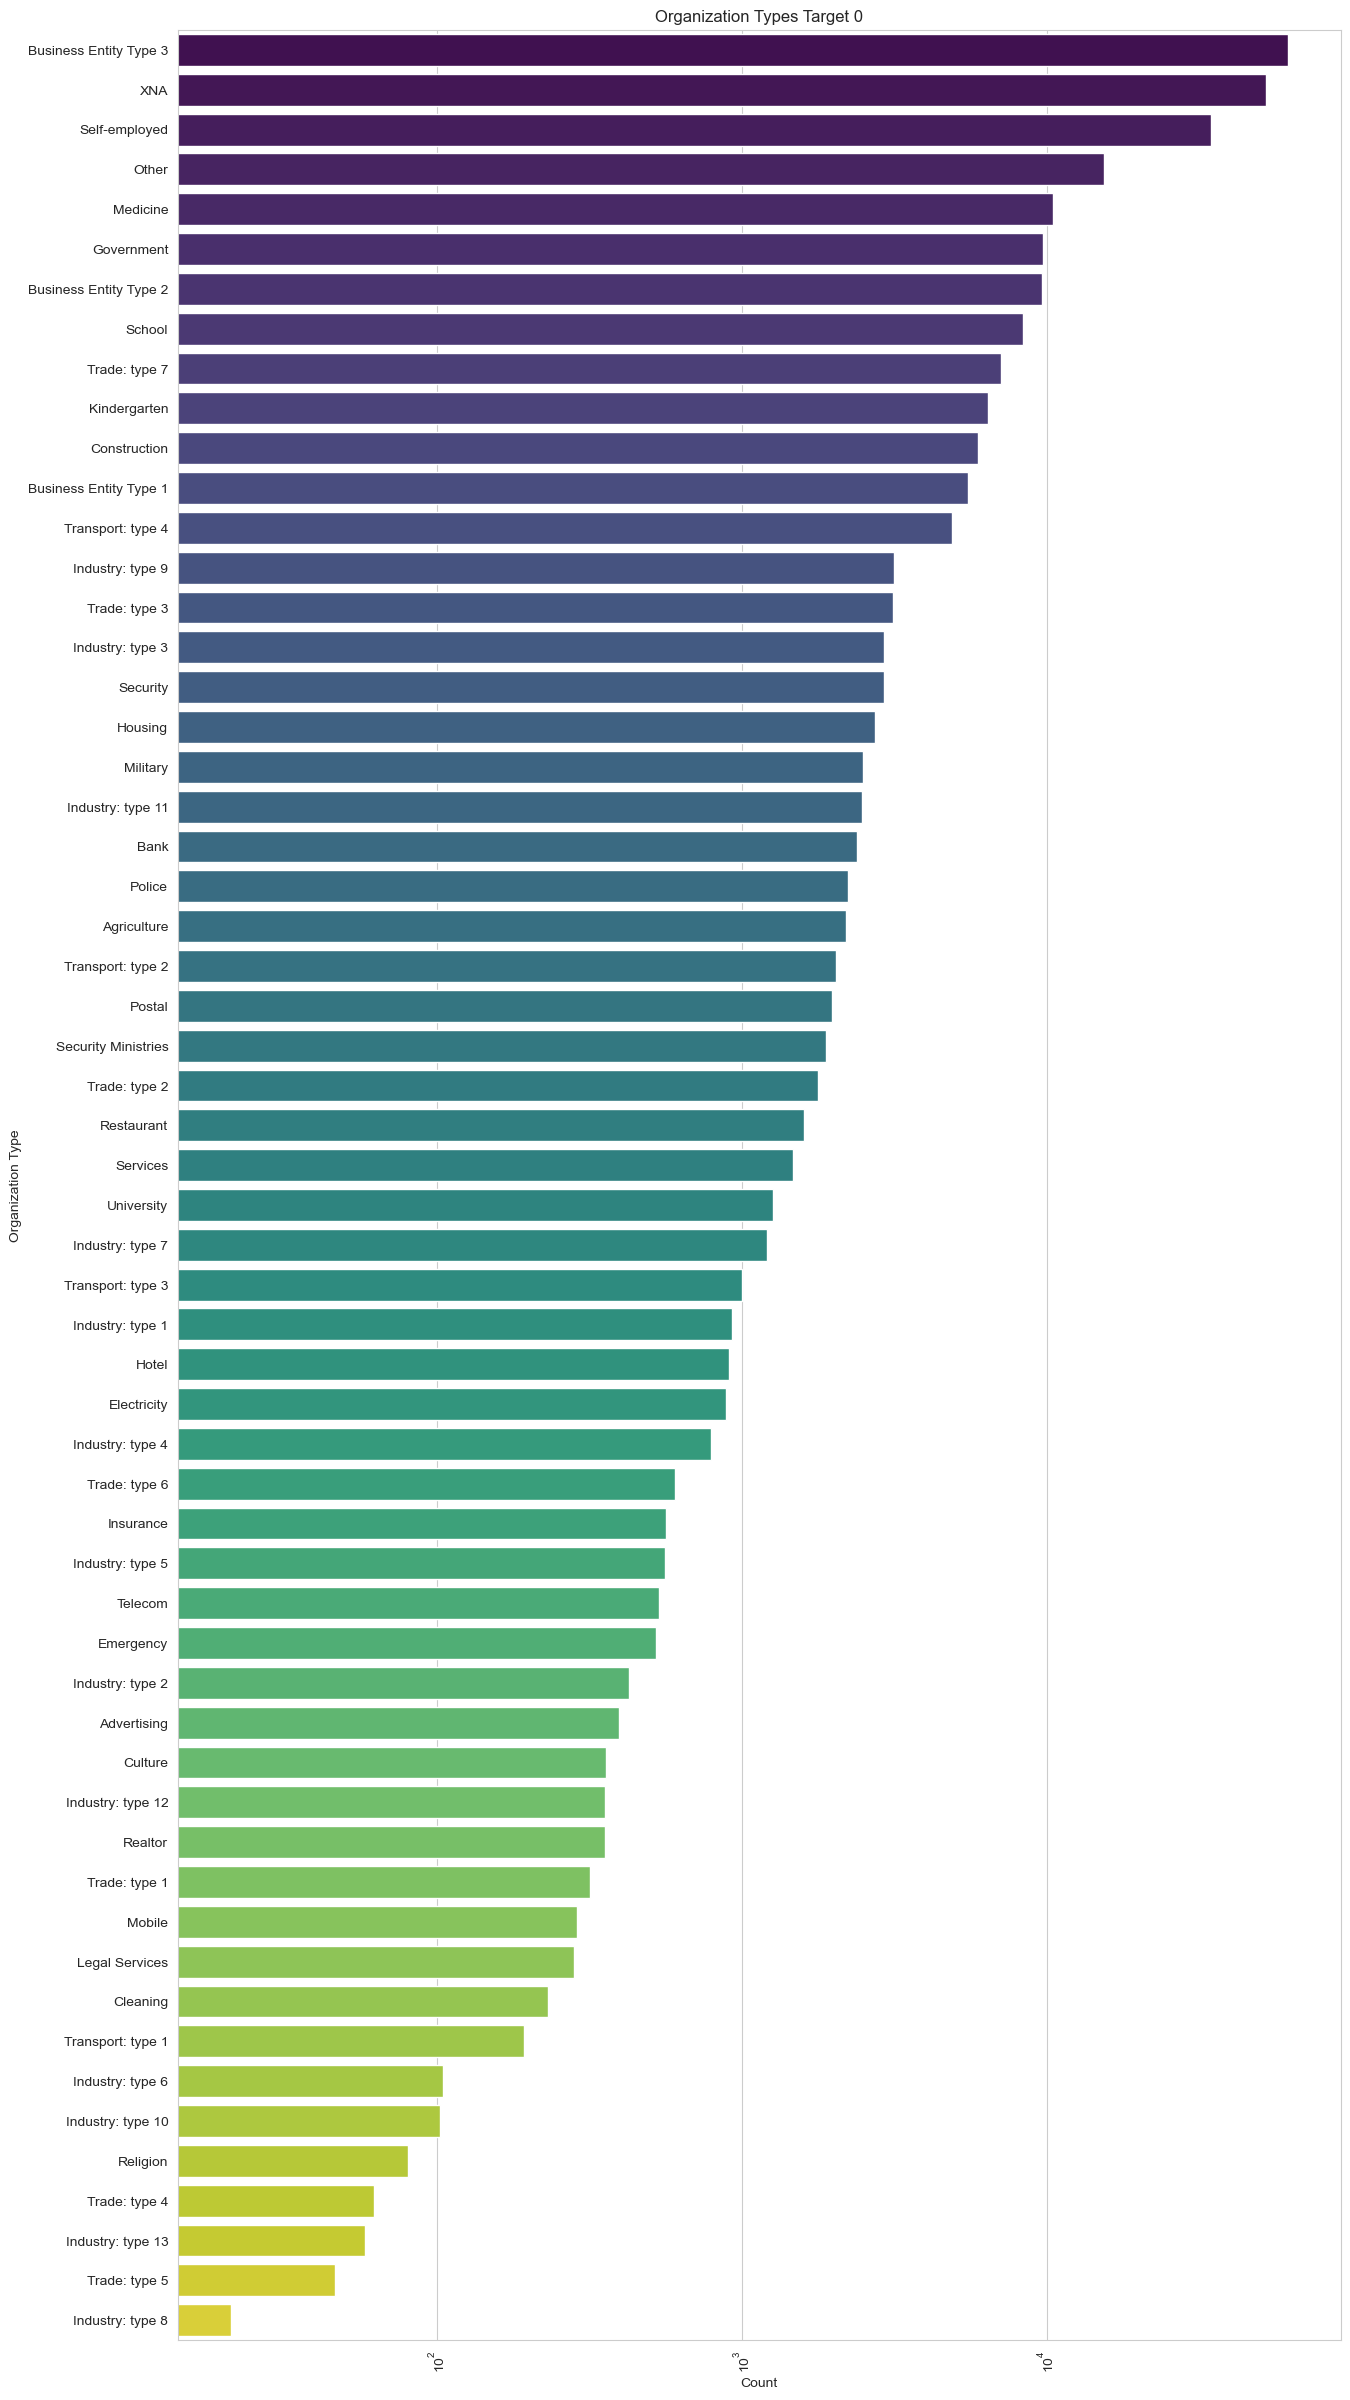

In [392]:
plt.figure(figsize=[15, 30])

sns.countplot(data =Target0, y = 'ORGANIZATION_TYPE', order = Target0['ORGANIZATION_TYPE'].value_counts().index, palette = 'viridis' )
plt.title('Organization Types Target 0')
plt.xticks(rotation=90)
plt.xscale('log')
plt.xlabel('Count')
plt.ylabel('Organization Type')

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_64640\3490167337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =Target1, y = 'ORGANIZATION_TYPE', order = Target1['ORGANIZATION_TYPE'].value_counts().index, palette = 'viridis' )


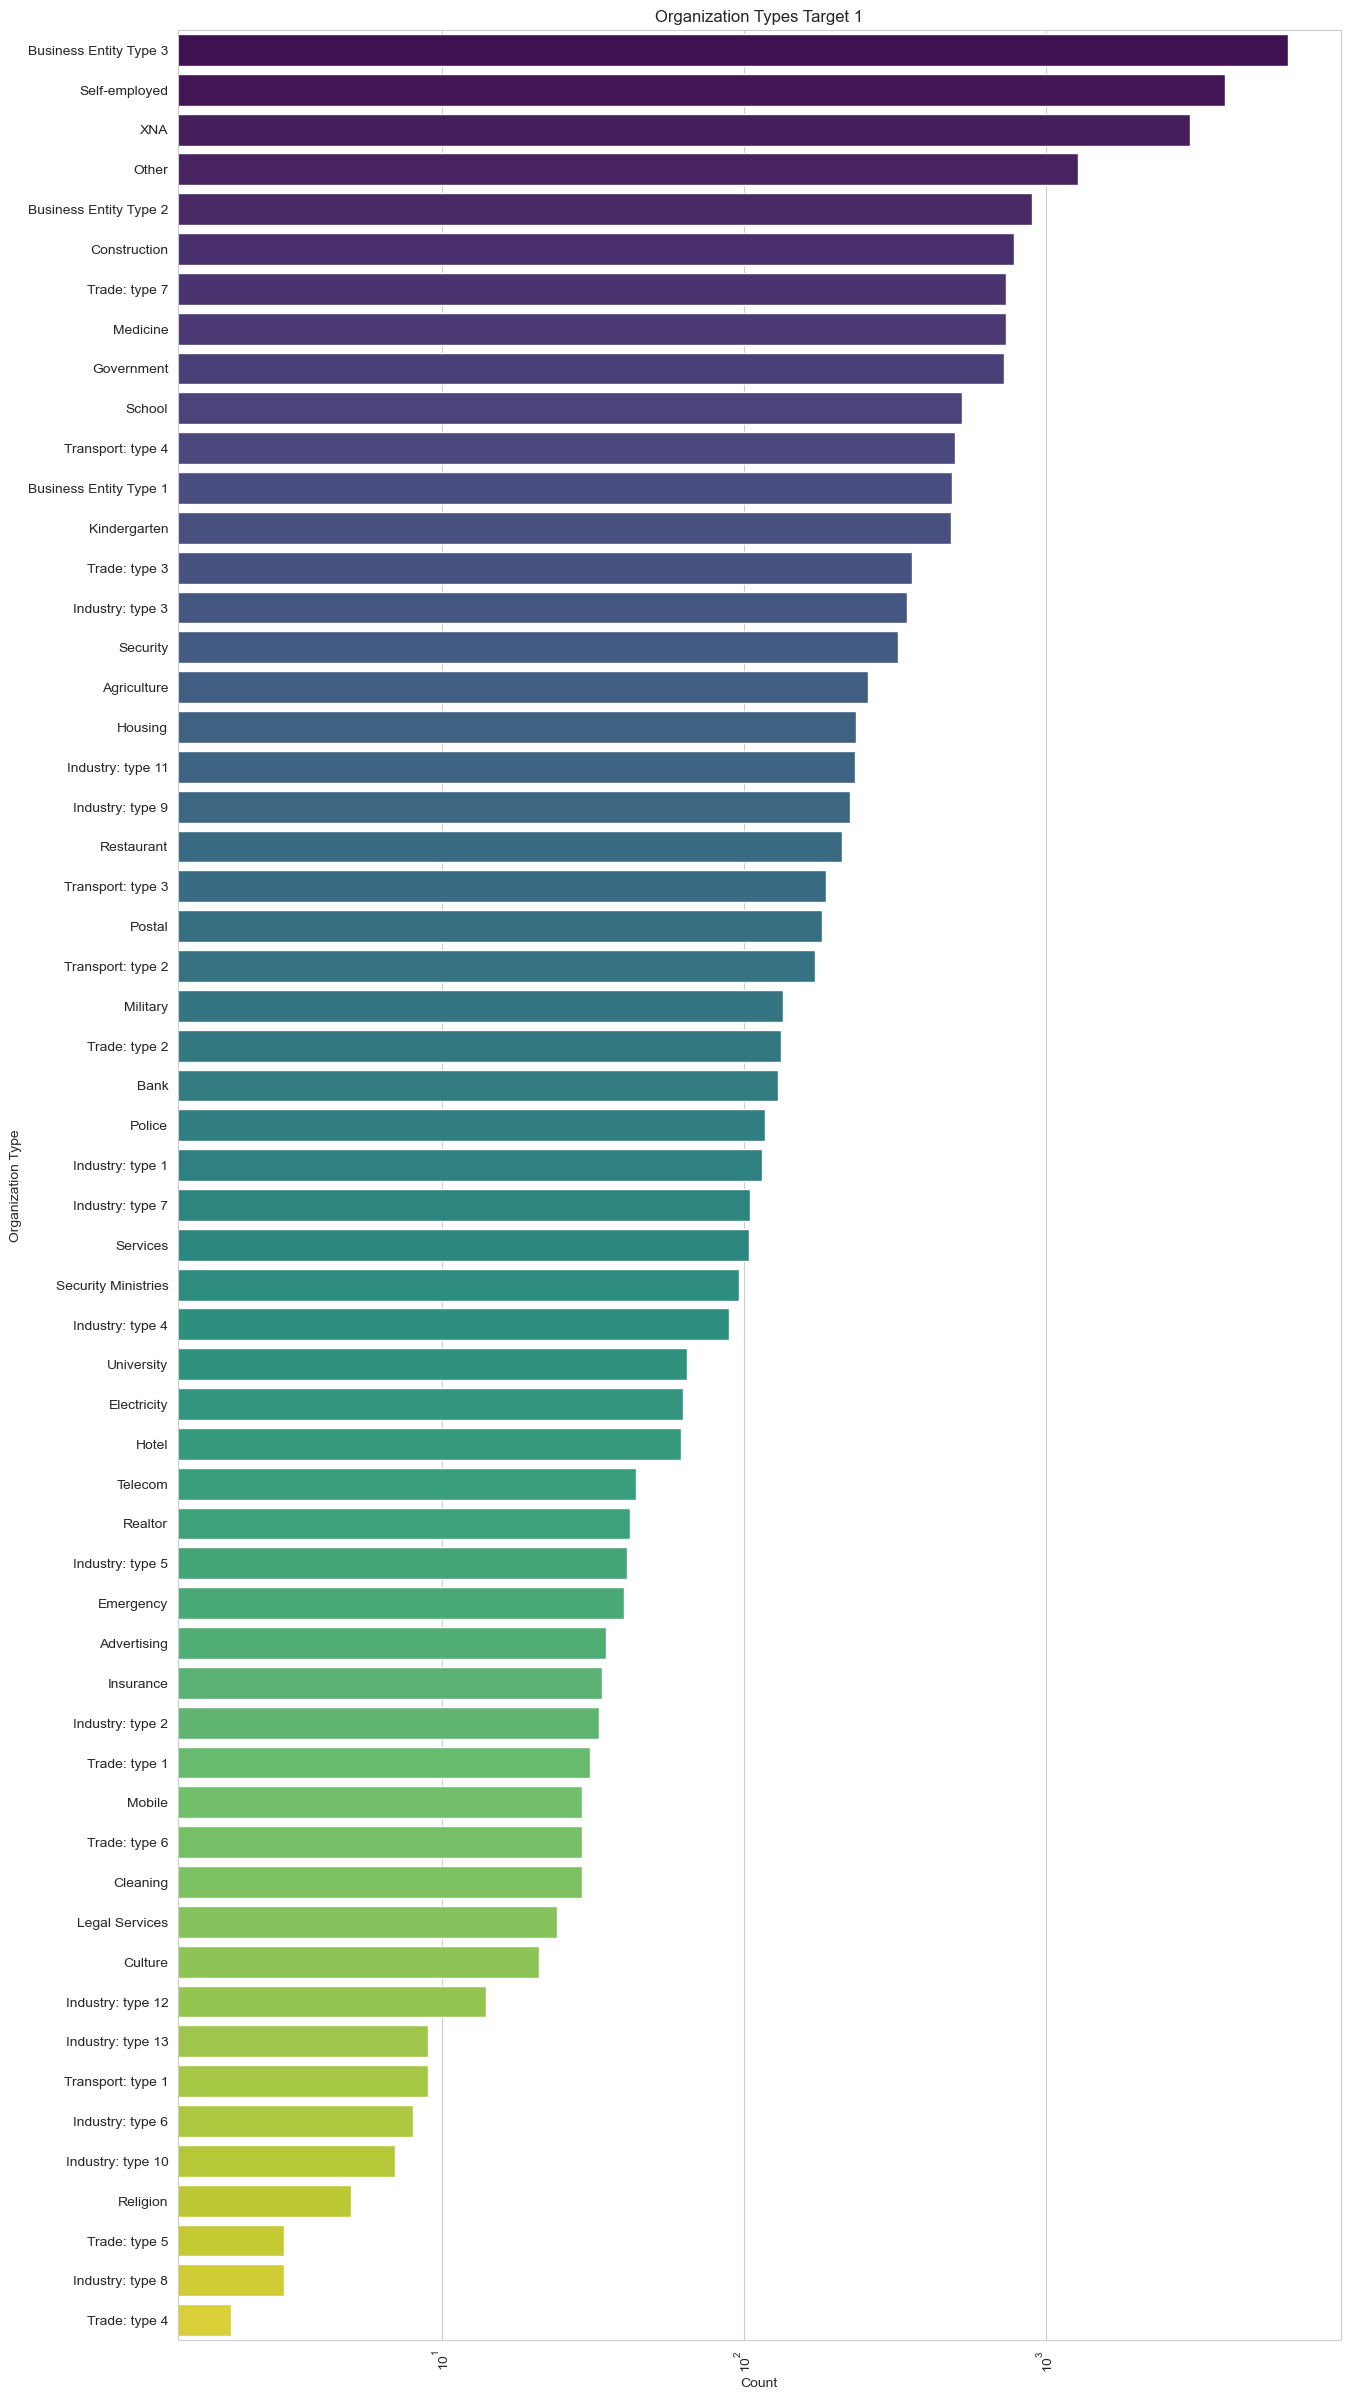

In [398]:
plt.figure(figsize=[15, 30])

sns.countplot(data =Target1, y = 'ORGANIZATION_TYPE', order = Target1['ORGANIZATION_TYPE'].value_counts().index, palette = 'viridis' )
plt.title('Organization Types Target 1')
plt.xticks(rotation=90)
plt.xscale('log')
plt.xlabel('Count')
plt.ylabel('Organization Type')

plt.show()

# correlation

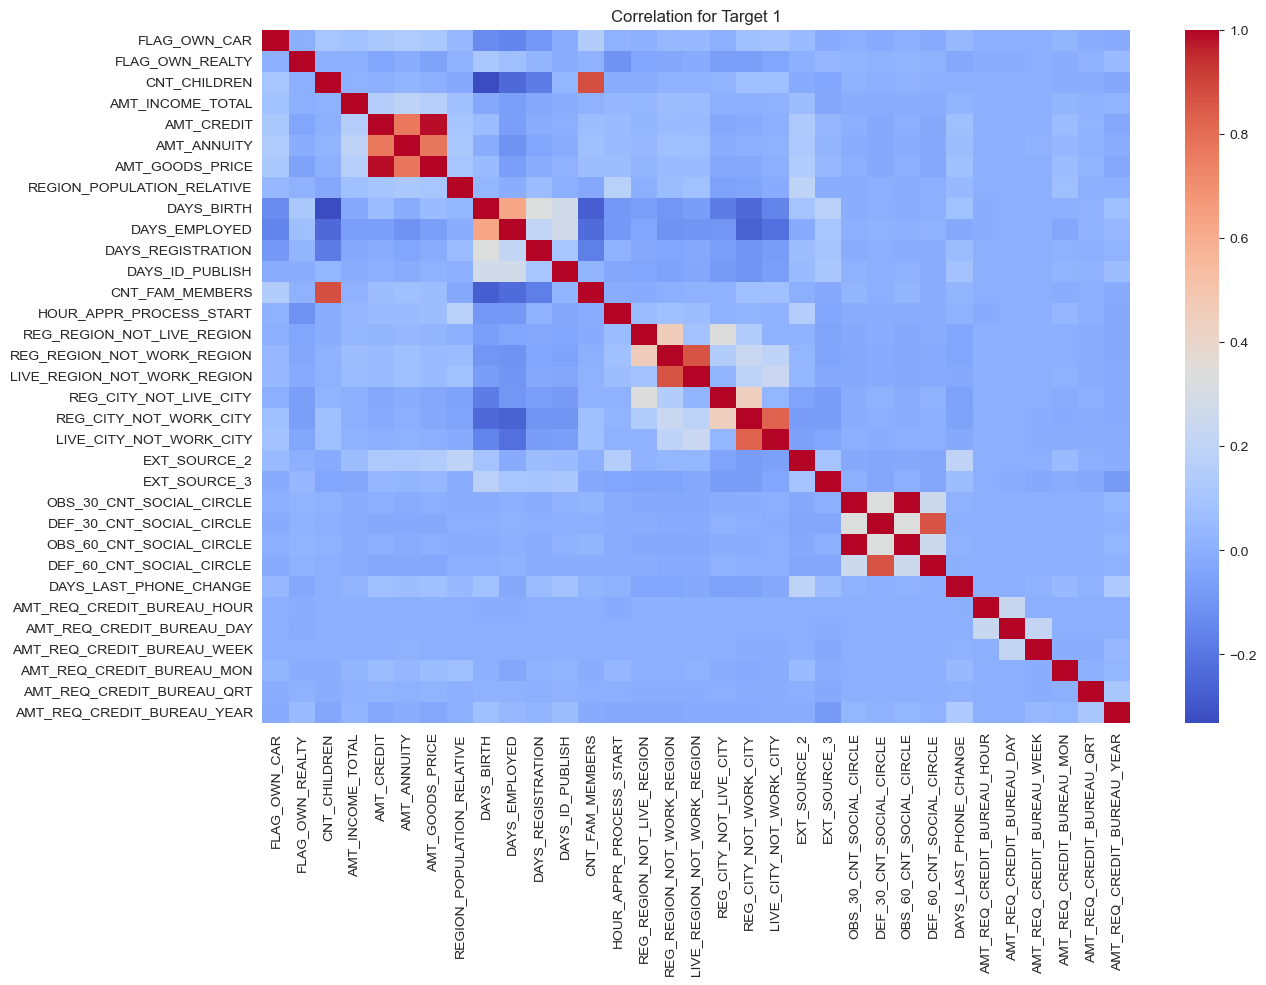

In [410]:
# ValueError: could not convert string to float: 'Cash loans'
Target0 = df1.select_dtypes(include=np.number)
target0Corr = Target0.iloc[0: , 2: ].corr()
plt.figure(figsize = [14,9])
sns.heatmap(target0Corr, annot = False, cmap = 'coolwarm')
plt.title('Correlation for Target 1')
plt.show()

# 1. Credit amount is inversely proportional to the date or birth, which means Credit amount is higher for low age and vice-versa.
# 2. Credit amount is inversely proportional to the number or children client have. means Credit amount is higher for less children count client
# have and vice-versa
# 3. Income amount is inversely ptcvtional to the number or children client have, means more income tor less children client have and vice-
# versa.
# 4. Less children client have in densely populated area
# 5. Credit amount is higher to densely populated area
# 6. The income is also higher in densely populated area.

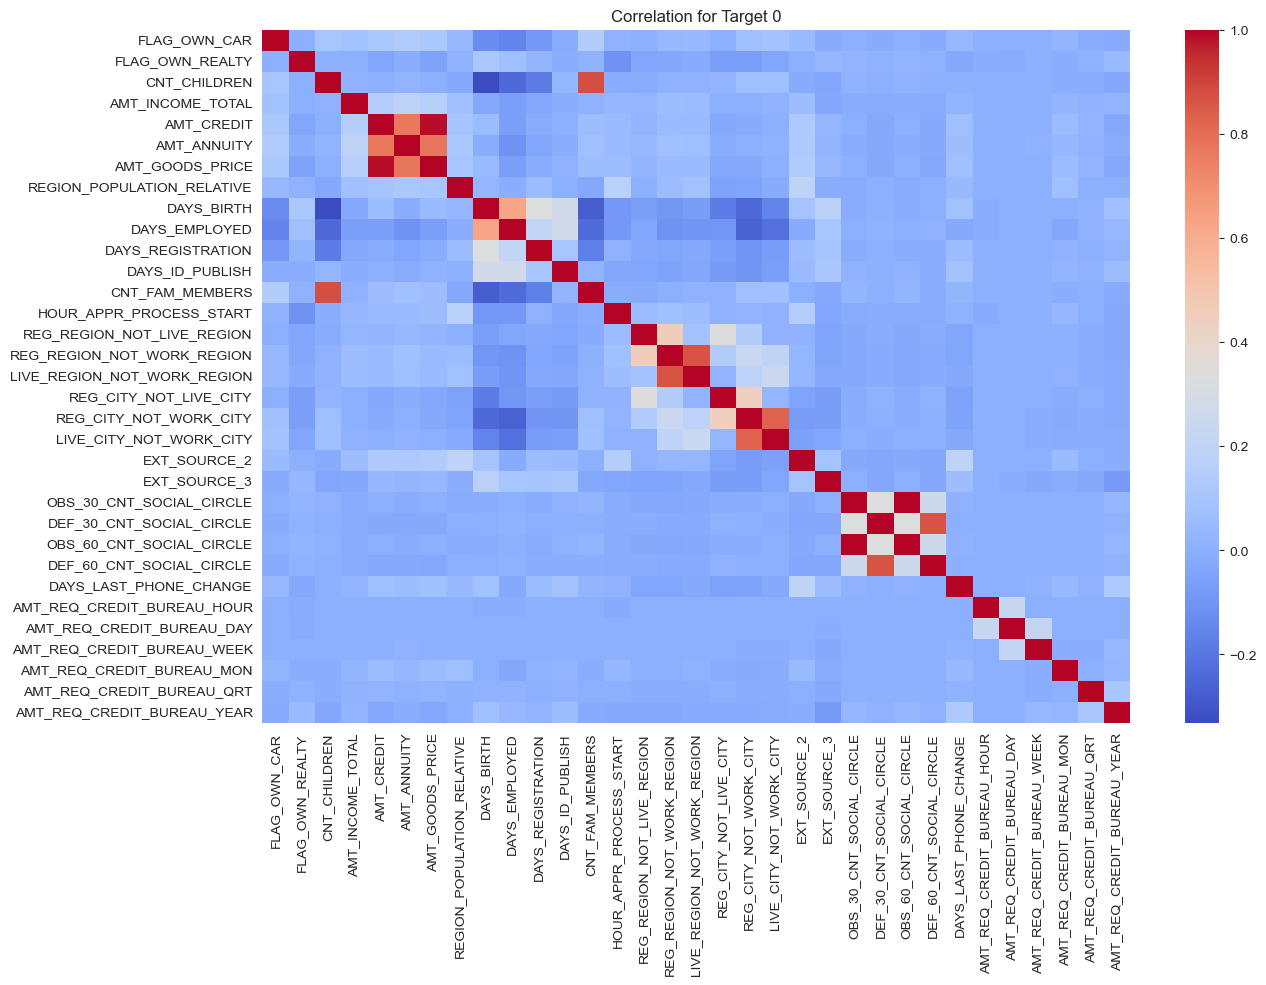

In [408]:
# ValueError: could not convert string to float: 'Cash loans'
Target1 = df1.select_dtypes(include=np.number)
target1Corr = Target1.iloc[0: , 2: ].corr()
target1Corr
# targetCorr = Target0.iloc[0: , 2: ].corr()
plt.figure(figsize = [14,9])
sns.heatmap(target1Corr, annot = False, cmap = 'coolwarm')
plt.title('Correlation for Target 1')
plt.show()

# Merging Two Dataset

In [413]:
combined_df= pd.merge(df1,df, on='SK_ID_CURR', how='inner')

In [415]:
combined_df.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)
display(combined_df.head(10))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
3,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest
2,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest
4,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest
9,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
10,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,Cash
8,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,XNA,Card X-Sell
13,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,LIMIT,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
5,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low


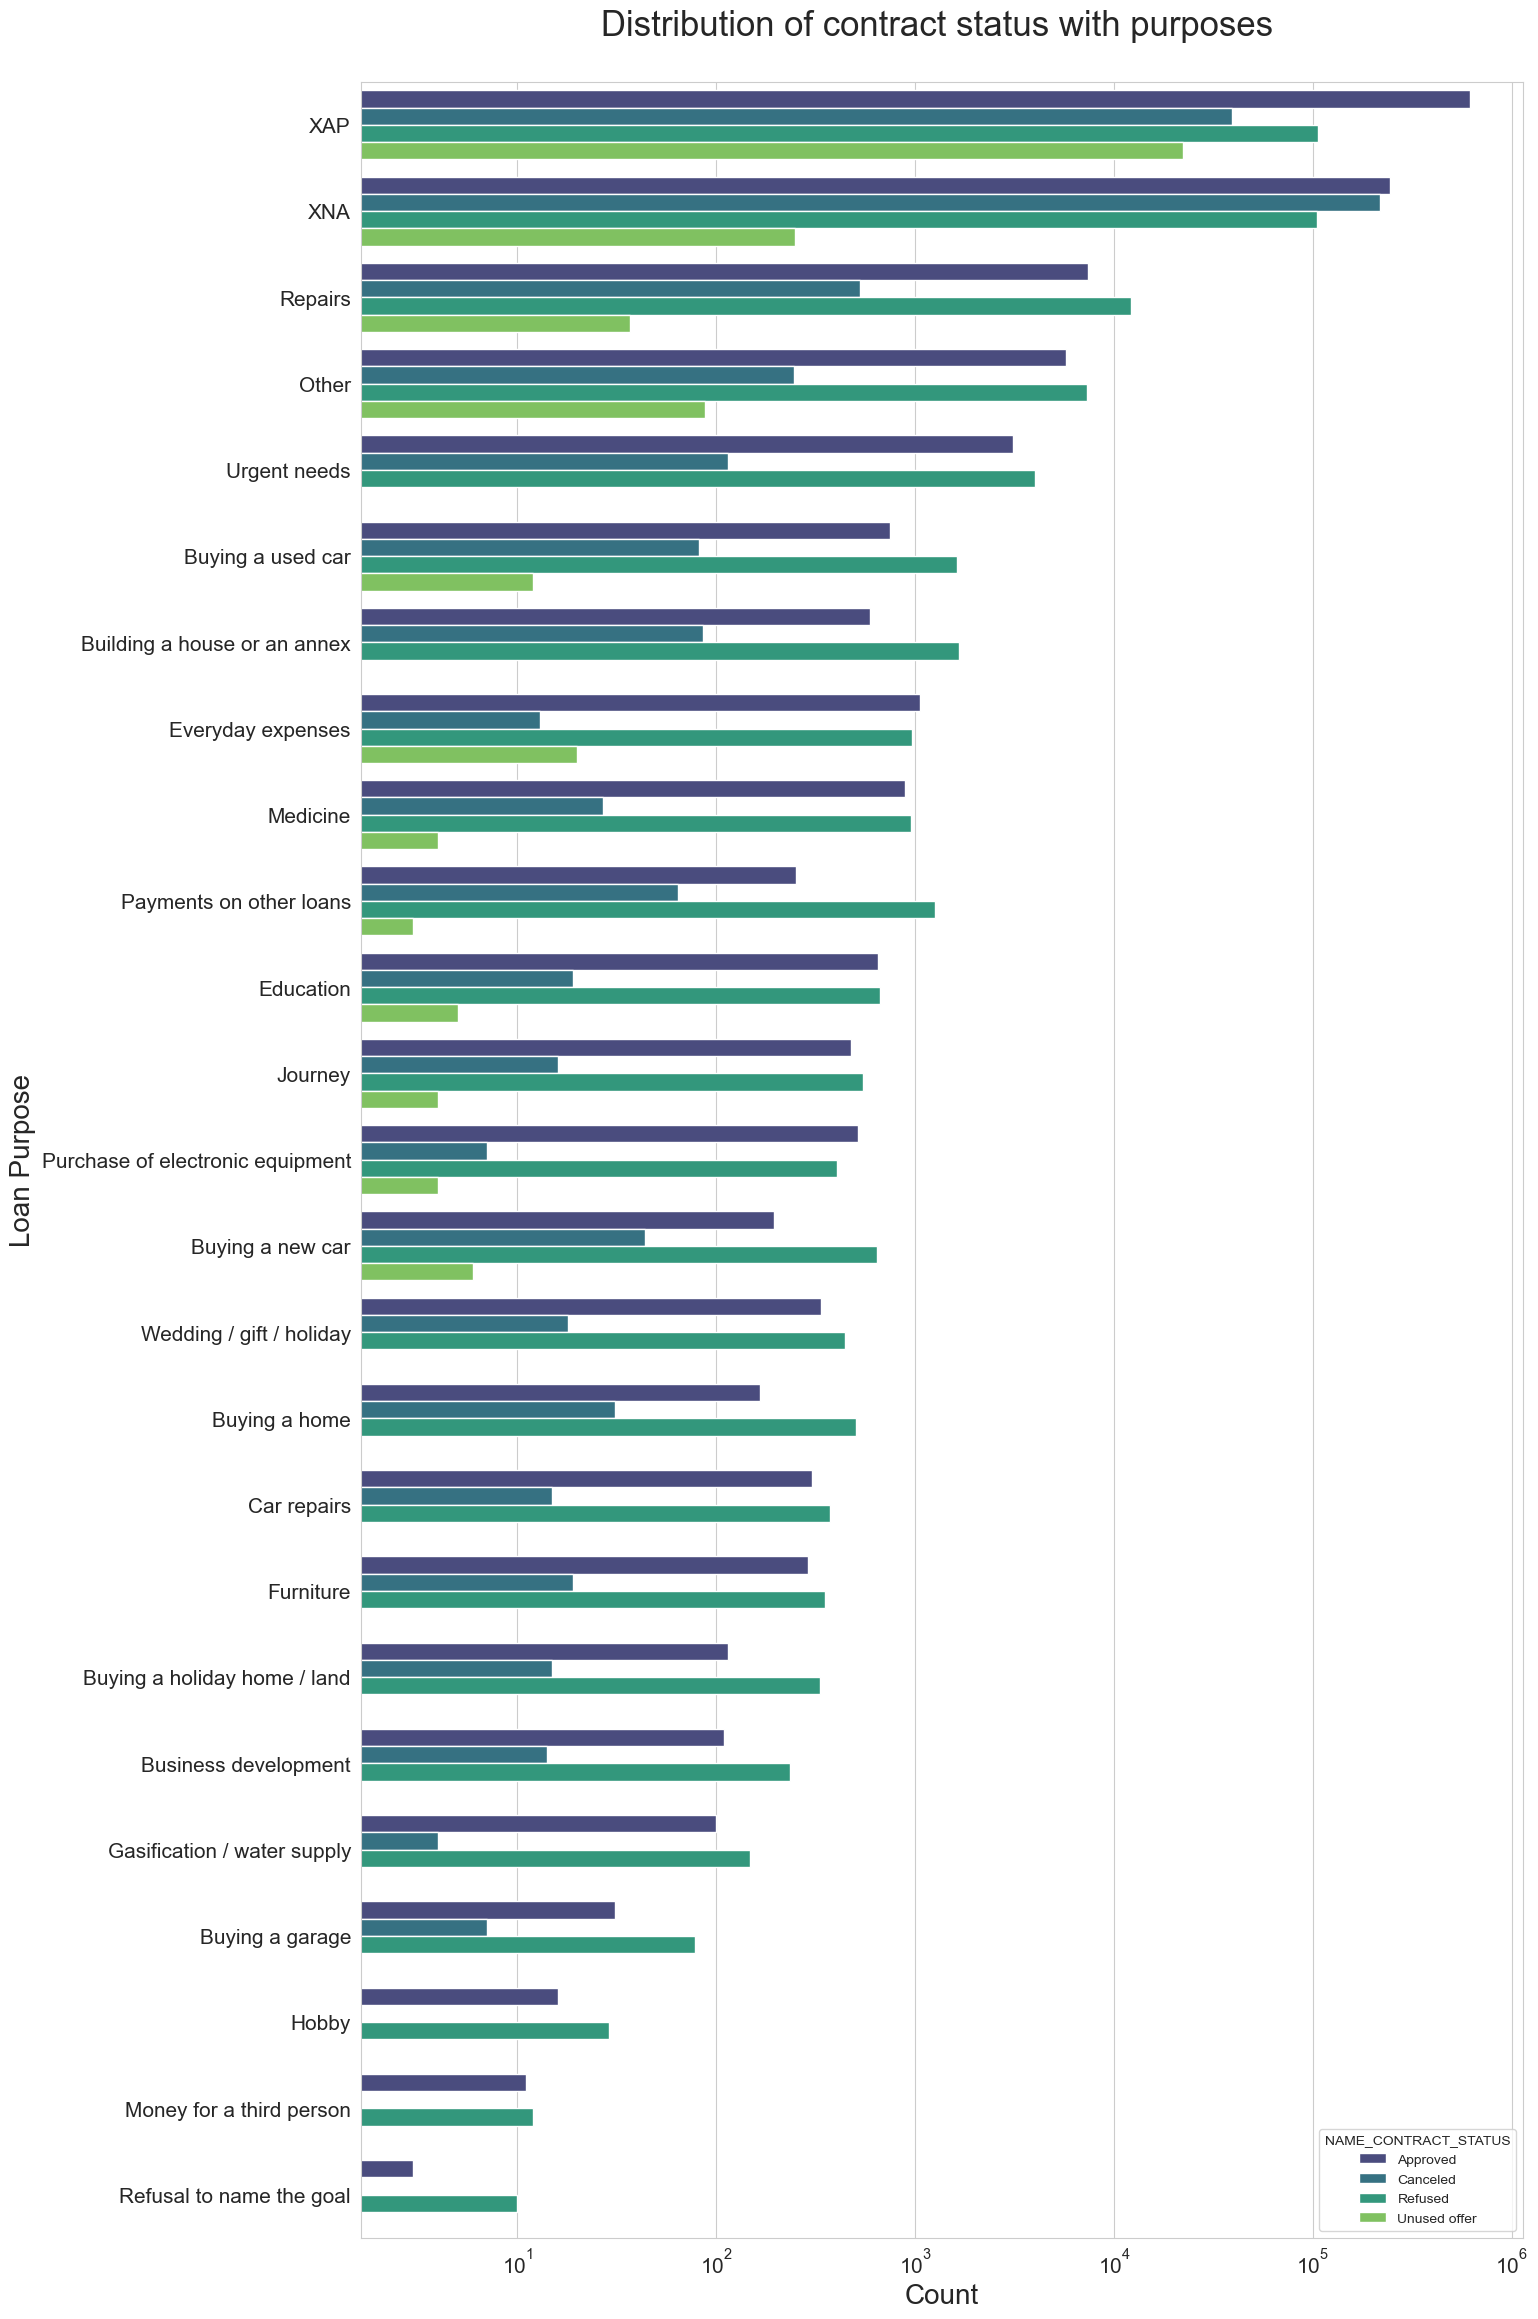

In [417]:
plt.figure(figsize=[15,28])

sns.countplot(data = combined_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=combined_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='viridis')

plt.title('Distribution of contract status with purposes \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_64640\2229371154.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =combined_df, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette='viridis', ci = None)


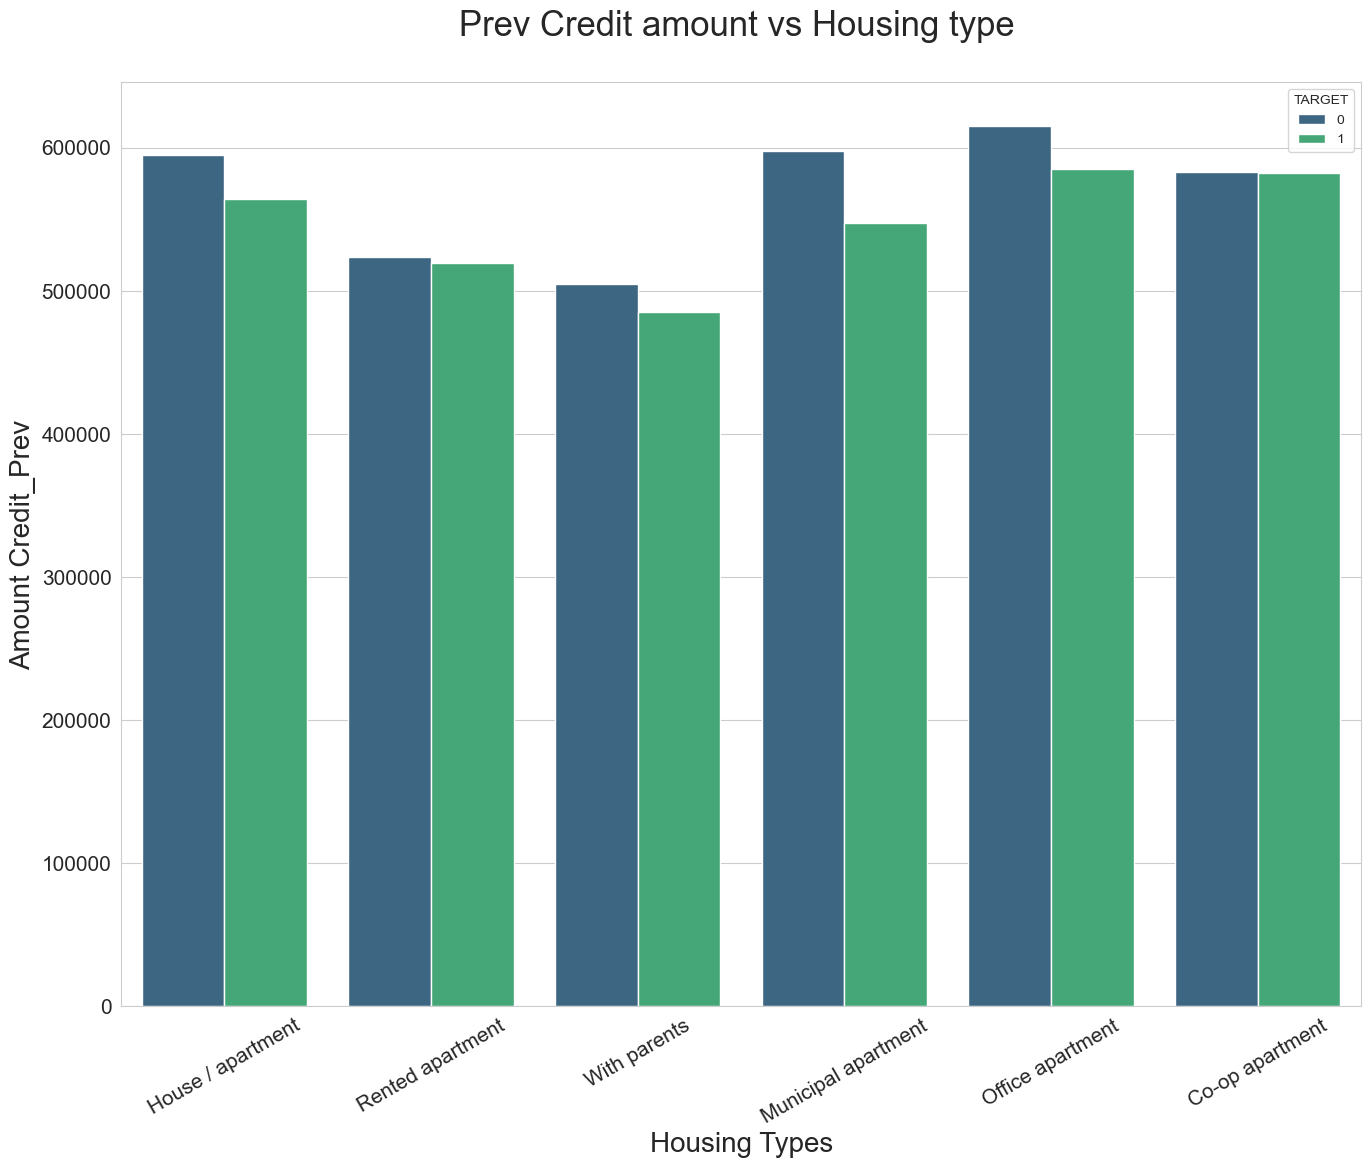

In [423]:
# Plotting for Credit amount prev vs Housing type,

plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =combined_df, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette='viridis', ci = None)
plt.title('Prev Credit amount vs Housing type \n', fontsize=25)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

# The analysis shows that office apartments have higher successful loan repayments (Target = 0), while co-op apartments are associated with higher repayment difficulties (Target = 1). To minimize defaults, the bank should prioritize loans for housing types like parents' house, house/apartment, and municipal apartments, as these categories demonstrate better repayment performance.

#  Conclusion:
Loan Type Focus:

Prioritize Consumer and Cash Loans as they dominate the dataset.
Investigate Revolving Loans to understand low adoption and develop targeted marketing strategies.
Approval & Cancellation Rates:

Streamline Approval Process to reduce the 20% cancellation rate.
Review Eligibility Criteria to address the 10-15% refusal rate.
Customer Retention:

Increase Acquisition of New Clients through targeted campaigns, as repeat clients dominate (80%).
Explore “Refreshed” Clients to better understand return borrowers.
Default Prevention:

Support Middle-Aged Clients (35-60), who face higher repayment difficulties.
Monitor AMT_CREDIT, AMT_GOODS_PRICE, and AMT_ANNUITY for better loan assessment and repayment predictions.
Housing Type Strategy:

Prioritize Loans for Office Apartments, Parents' Houses, and Municipal Apartments for better repayment performance.
Avoid Co-op Apartments due to higher default rates.
Demographic Insights:

Target Female Clients more, as they have higher non-default rates.
Focus on Lower-Credit, Higher-Income Clients (fewer children, densely populated areas) for better loan outcomes.
Action Plan:
Revise Loan Products for middle-aged clients and improve eligibility criteria.
Enhance Data Collection to clean up underrepresented XNA category.
Implement Tailored Marketing for both new and repeat clients based on demographic and loan type insights. -->